## Detecting fraudulent transactions on PaySim Generated data using Machine Learning (LSTM)

### Overview of data

Explanation provided by dataset creators:-

    step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. 
    
    type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

    amount - amount of the transaction in local currency.

    nameOrig - customer who started the transaction

    oldbalanceOrg - initial balance before the transaction

    newbalanceOrig - new balance after the transaction

    nameDest - customer who is the recipient of the transaction

    oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

    newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

    isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

    isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200,000 in a single transaction.

In [2]:
#Importing libraries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
""" 4 datasets generated from paysim are used to increase the number of fraudulent transactions (reduce imbalance between 
fraud and non fraud)"""

df1 = pd.read_csv('Datasets/Train_1.csv')
df2 = pd.read_csv('Datasets/Train_2.csv')
df3 = pd.read_csv('Datasets/Train_3.csv')
df4 = pd.read_csv('Datasets/Train_4.csv')

In [3]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df2.head()

,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
0,1,CASH_IN,120987.21,C7742732825,69.17,121056.38,M6028154506,0.0,0.0,0,0,0
1,1,CASH_IN,227065.88,C5905998527,91.10,227156.97,M5972638209,0.0,0.0,0,0,0
2,1,CASH_IN,141285.89,C5905998527,227156.97,368442.86,M3960779355,0.0,0.0,0,0,0
3,1,CASH_IN,283351.91,C6055382278,67.48,283419.39,M2989457828,0.0,0.0,0,0,0
4,1,CASH_IN,166342.78,C4763615815,21354.84,187697.62,M6906391150,0.0,0.0,0,0,0


In [5]:
df3.head()

,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
0,0,TRANSFER,8.53,C9293526308,8.53,0.00,CC5583946941,0.0,8.53,1,0,0
1,0,CASH_OUT,8.53,CC5583946941,8.53,0.00,M0285336194,0.0,0.00,1,0,0
2,1,CASH_IN,95473.80,C4530931674,92.49,95566.29,M7566148037,0.0,0.00,0,0,0
3,1,CASH_IN,37675.90,C6012132447,87.20,37763.11,M9398540422,0.0,0.00,0,0,0
4,1,CASH_IN,218422.71,C1872122920,16.20,218438.90,M0425703007,0.0,0.00,0,0,0


In [6]:
df4.head()

,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
0,1,PAYMENT,10196.63,C2411451899,23.68,-10172.95,M1358270294,0.0,10196.63,0,0,0
1,1,CASH_IN,2958.25,C3643939923,68.50,3026.75,M9298153125,0.0,0.00,0,0,0
2,1,CASH_IN,202609.36,C6424971470,33.20,202642.56,M8509017484,0.0,0.00,0,0,0
3,1,CASH_IN,94248.76,C0965588240,51111.36,145360.12,M7339390318,0.0,0.00,0,0,0
4,1,CASH_IN,162418.25,C8002090071,10266.24,172684.49,M4497578932,0.0,0.00,0,0,0


In [7]:
df1.rename(columns={'type': 'action', 'oldbalanceOrg': 'oldBalanceOrig', 
                    'newbalanceOrig': 'newBalanceOrig','oldbalanceDest': 'oldBalanceDest', 'newbalanceDest': 'newBalanceDest'}, inplace=True)
df1.head()

,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
# Only extracting out the fraud samples
t2 = df2[df2['isFraud'] == 1]
t3 = df3[df3['isFraud'] == 1]
t4 = df4[df4['isFraud'] == 1]

In [9]:
# Merging
df = pd.concat([df1,t2,t3,t4], axis=0)
df

,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,NaN
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,NaN
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,NaN
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,NaN
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3210701,717,CASH_OUT,3465336.96,CC3159427517,3465336.96,0.00,M5780277658,188880.51,188880.51,1,0,0.0
3210813,717,TRANSFER,11301545.44,C3579823852,11301545.44,0.00,CC5120225154,0.00,11301545.44,1,0,0.0
3210814,717,CASH_OUT,11301545.44,CC5120225154,11301545.44,0.00,M5224217482,181855.77,181855.77,1,0,0.0
3210864,718,TRANSFER,3208940.01,C8705682781,3208940.01,0.00,CC1983814211,0.00,3208940.01,1,0,0.0


Basic feature engineering is performed before exploratory data analysis (EDA) to assess the usefulness of newly created features. These features are designed based on the data explanations provided by the creators of the Paysim Generator.

In [10]:
df['nameOrig_initial'] = df['nameOrig'].astype(str).str[0]
df['nameDest_initial'] = df['nameDest'].astype(str).str[0]

The name have 2 formats:

    C = Customer
    M = Merchants
    
Above we extracted out the initial name string

In [11]:
df['errorOrig'] = df['newBalanceOrig'] + df['amount'] - df['oldBalanceOrig']
df['errorDest'] = df['oldBalanceDest'] + df['amount'] - df['newBalanceDest']

Upon visual inspection of the data, some values appear to contradict mathematical principles, suggesting potential calculation errors. These discrepancies will be further investigated in the next analysis stage.

### Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6366946 entries, 0 to 3210865
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   step                     int64  
 1   action                   object 
 2   amount                   float64
 3   nameOrig                 object 
 4   oldBalanceOrig           float64
 5   newBalanceOrig           float64
 6   nameDest                 object 
 7   oldBalanceDest           float64
 8   newBalanceDest           float64
 9   isFraud                  int64  
 10  isFlaggedFraud           int64  
 11  isUnauthorizedOverdraft  float64
 12  nameOrig_initial         object 
 13  nameDest_initial         object 
 14  errorOrig                float64
 15  errorDest                float64
dtypes: float64(8), int64(3), object(5)
memory usage: 825.8+ MB


In [13]:
numerical_features = [
    'step', 'amount', 'oldBalanceOrig', 'newBalanceOrig',
    'oldBalanceDest', 'newBalanceDest', 'isFraud',
    'isFlaggedFraud', 'isUnauthorizedOverdraft','errorOrig','errorDest'
]
categorical_features = ['action', 'nameOrig', 'nameDest','nameOrig_initial','nameDest_initial']


### Univariate

In [14]:
df.isnull().sum()

step                             0
action                           0
amount                           0
nameOrig                         0
oldBalanceOrig                   0
newBalanceOrig                   0
nameDest                         0
oldBalanceDest                   0
newBalanceDest                   0
isFraud                          0
isFlaggedFraud                   0
isUnauthorizedOverdraft    6362620
nameOrig_initial                 0
nameDest_initial                 0
errorOrig                        0
errorDest                        0
dtype: int64

#### Numerical

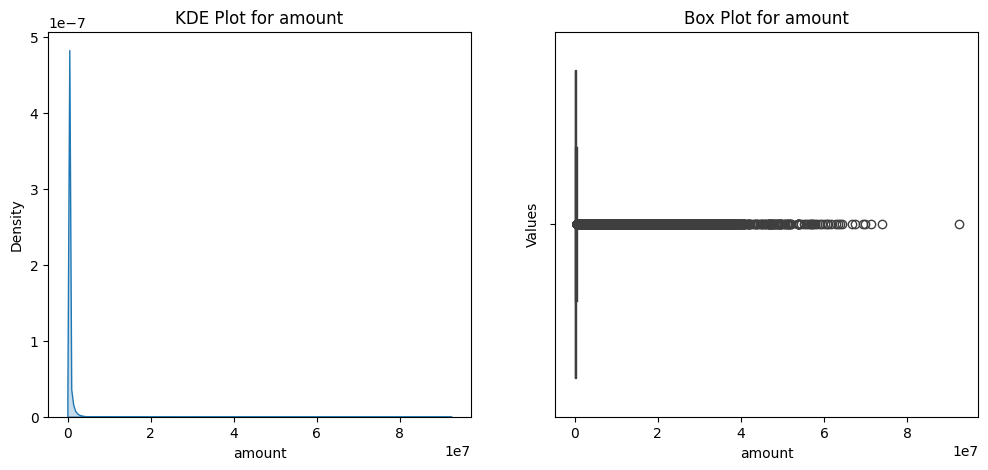

count    6.366946e+06
mean     1.824922e+05
std      6.153602e+05
min      0.000000e+00
25%      1.340225e+04
50%      7.502626e+04
75%      2.090619e+05
max      9.244552e+07
Name: amount, dtype: float64

In [15]:
x = 'amount'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Kde plot
sns.kdeplot(df[x], ax=axes[0], fill=True)
axes[0].set_title(f'KDE Plot for {x}')
axes[0].set_xlabel(x)
axes[0].set_ylabel('Density')

# Box Plot
sns.boxplot(x=df[x], ax=axes[1])
axes[1].set_title(f'Box Plot for {x}')
axes[1].set_xlabel(x)
axes[1].set_ylabel('Values')

plt.show()
df[x].describe()

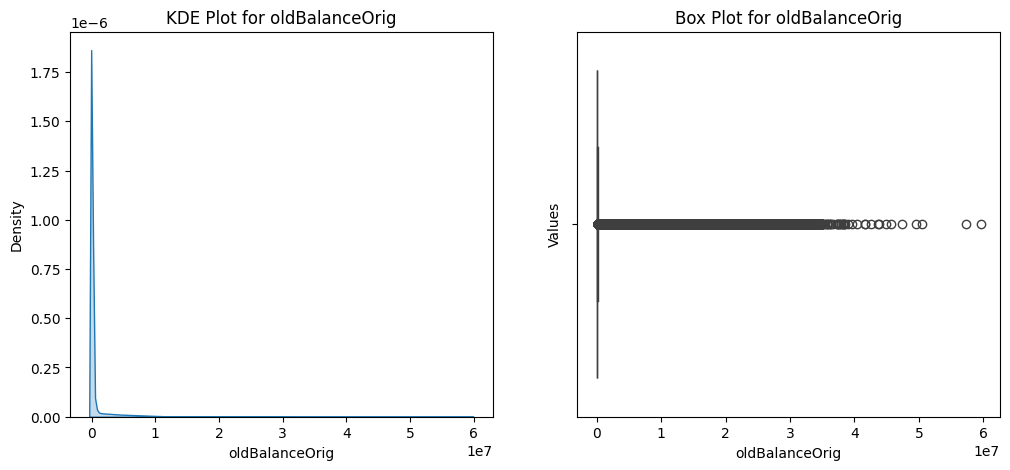

count    6.366946e+06
mean     8.360690e+05
std      2.889187e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.428900e+04
75%      1.075630e+05
max      5.958504e+07
Name: oldBalanceOrig, dtype: float64

In [16]:
x = 'oldBalanceOrig'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

#Kde plot
sns.kdeplot(df[x], ax=axes[0], fill=True)
axes[0].set_title(f'KDE Plot for {x}')
axes[0].set_xlabel(x)
axes[0].set_ylabel('Density')

# Box Plot
sns.boxplot(x=df[x], ax=axes[1])
axes[1].set_title(f'Box Plot for {x}')
axes[1].set_xlabel(x)
axes[1].set_ylabel('Values')

plt.show()
df[x].describe()


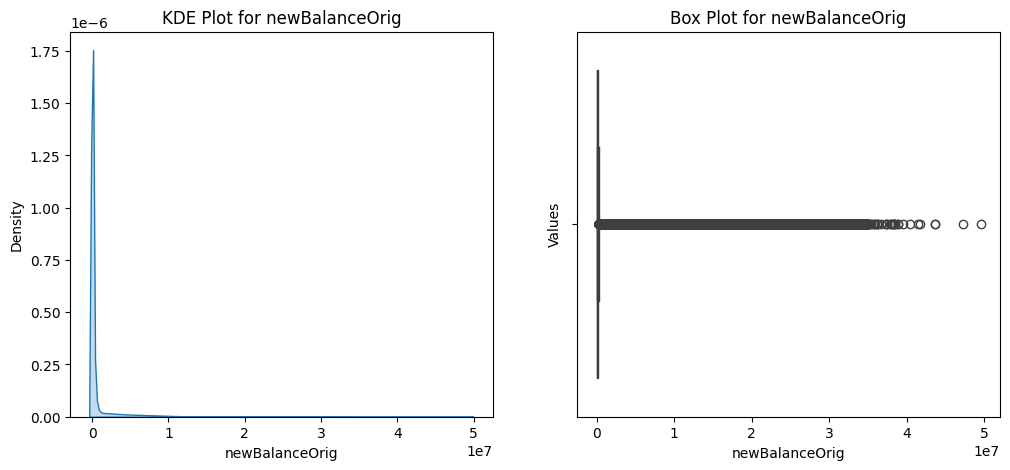

count    6.366946e+06
mean     8.545327e+05
std      2.923140e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.439848e+05
max      4.958504e+07
Name: newBalanceOrig, dtype: float64

In [17]:
x = 'newBalanceOrig'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Kde plot
sns.kdeplot(df[x], ax=axes[0], fill=True)
axes[0].set_title(f'KDE Plot for {x}')
axes[0].set_xlabel(x)
axes[0].set_ylabel('Density')

# Box Plot
sns.boxplot(x=df[x], ax=axes[1])
axes[1].set_title(f'Box Plot for {x}')
axes[1].set_xlabel(x)
axes[1].set_ylabel('Values')

plt.show()
df[x].describe()

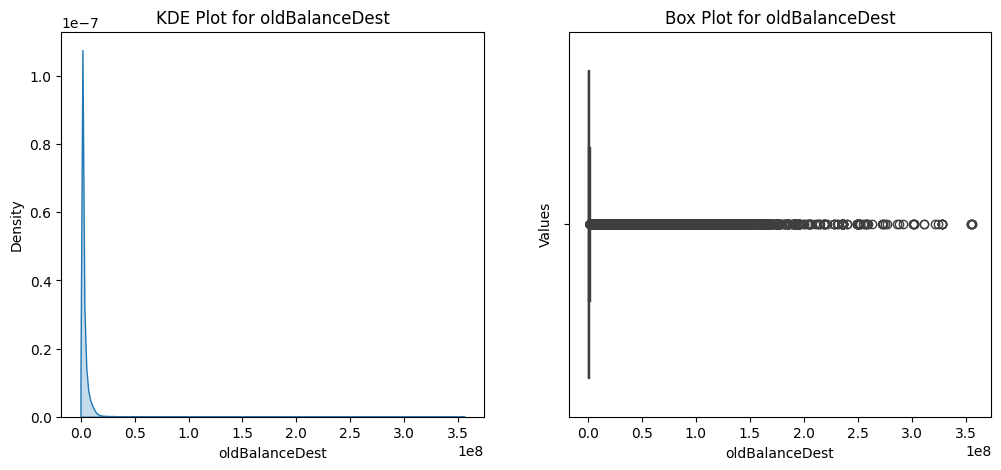

count    6.366946e+06
mean     1.100001e+06
std      3.398132e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.324294e+05
75%      9.419821e+05
max      3.560159e+08
Name: oldBalanceDest, dtype: float64

In [18]:
x = 'oldBalanceDest'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Kde plot
sns.kdeplot(df[x], ax=axes[0], fill=True)
axes[0].set_title(f'KDE Plot for {x}')
axes[0].set_xlabel(x)
axes[0].set_ylabel('Density')

# Box Plot
sns.boxplot(x=df[x], ax=axes[1])
axes[1].set_title(f'Box Plot for {x}')
axes[1].set_xlabel(x)
axes[1].set_ylabel('Values')

plt.show()
df[x].describe()

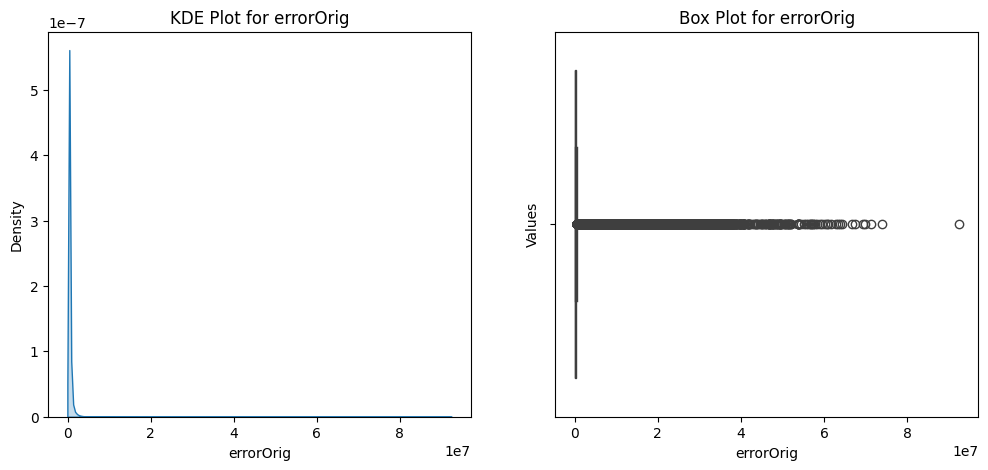

count    6.366946e+06
mean     2.009558e+05
std      6.064670e+05
min     -1.000000e-02
25%      2.912283e+03
50%      6.848544e+04
75%      2.494707e+05
max      9.244552e+07
Name: errorOrig, dtype: float64

In [19]:
x = 'errorOrig'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Kde plot
sns.kdeplot(df[x], ax=axes[0], fill=True)
axes[0].set_title(f'KDE Plot for {x}')
axes[0].set_xlabel(x)
axes[0].set_ylabel('Density')

# Box Plot
sns.boxplot(x=df[x], ax=axes[1])
axes[1].set_title(f'Box Plot for {x}')
axes[1].set_xlabel(x)
axes[1].set_ylabel('Values')

plt.show()
df[x].describe()

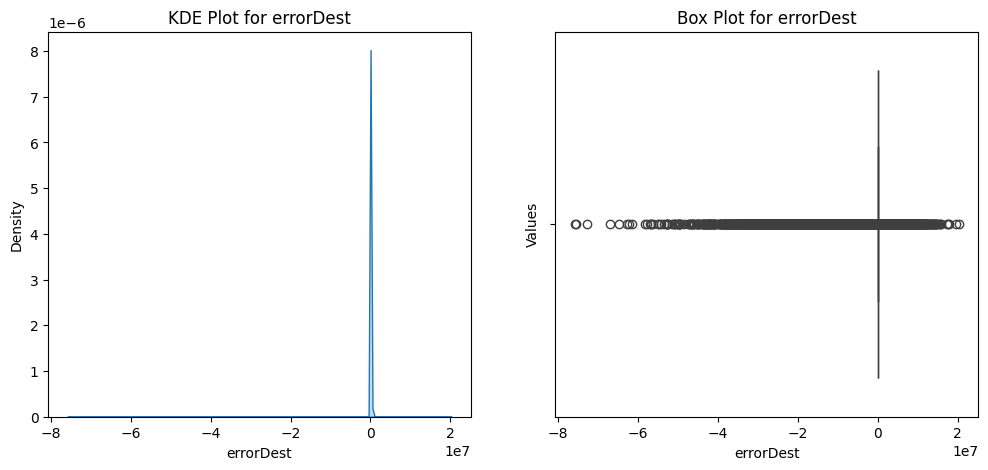

count    6.366946e+06
mean     5.690565e+04
std      4.497618e+05
min     -7.588573e+07
25%      0.000000e+00
50%      3.500240e+03
75%      2.940596e+04
max      2.029242e+07
Name: errorDest, dtype: float64

In [20]:
x = 'errorDest'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Kde plot
sns.kdeplot(df[x], ax=axes[0], fill=True)
axes[0].set_title(f'KDE Plot for {x}')
axes[0].set_xlabel(x)
axes[0].set_ylabel('Density')

# Box Plot
sns.boxplot(x=df[x], ax=axes[1])
axes[1].set_title(f'Box Plot for {x}')
axes[1].set_xlabel(x)
axes[1].set_ylabel('Values')

plt.show()
df[x].describe()

Based on the IQR values, the numerical features appear to contain a significant number of outliers. These outliers will need to be addressed appropriately, potentially through removal or other methods.

#### Categorical

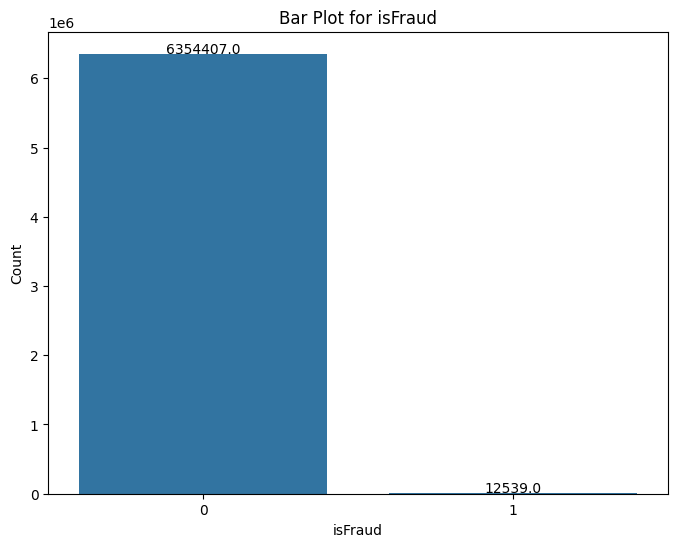

count    6.366946e+06
mean     1.969390e-03
std      4.433409e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: isFraud, dtype: float64

In [21]:
x = 'isFraud'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=x, data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Bar Plot for isFraud')
plt.xlabel(x)
plt.ylabel('Count')

plt.show()
df[x].describe()

This dataset exhibits a pronounced imbalance: only 12,539 transactions are labeled as fraud, compared to 6.3 million non-fraudulent transactions.

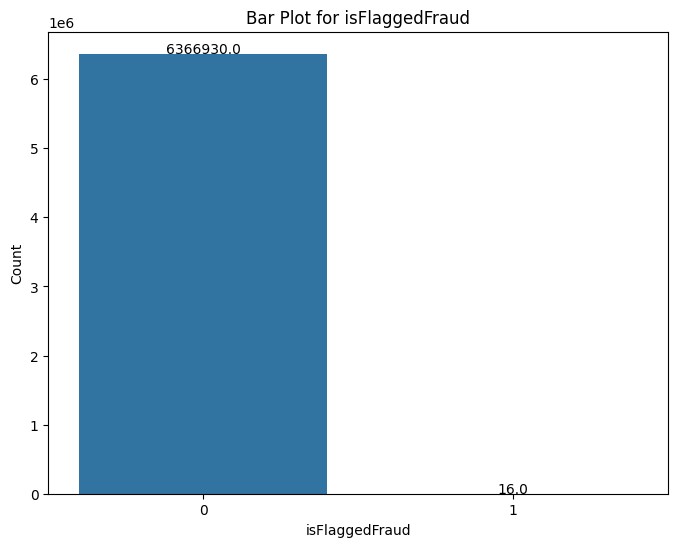

count    6.366946e+06
mean     2.512979e-06
std      1.585236e-03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: isFlaggedFraud, dtype: float64

In [22]:
x = 'isFlaggedFraud'

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=x, data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Bar Plot for isFlaggedFraud')
plt.xlabel(x)
plt.ylabel('Count')

plt.show()
df[x].describe()

The system has flagged 16 transactions to have transfer amount of over 200,000

In [23]:
df[df['isFlaggedFraud']==1].action.value_counts()

action
TRANSFER    16
Name: count, dtype: int64

In [24]:
df[df['isFlaggedFraud']==1]['amount'].value_counts()

amount
10000000.00    3
4953893.08     1
1343002.08     1
536624.41      1
4892193.09     1
9585040.37     1
3576297.10     1
353874.22      1
2542664.27     1
399045.08      1
3441041.46     1
3171085.59     1
7316255.05     1
5674547.89     1
Name: count, dtype: int64

isFlaggedFraud = 1 when the amount transferred is more than 200,000.

In [25]:
df_transfer = df[df['action']=='TRANSFER']
df_transfer

,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft,nameOrig_initial,nameDest_initial,errorOrig,errorDest
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,NaN,C,C,0.00,181.00
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,NaN,C,C,214605.30,237735.30
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,NaN,C,C,300850.89,-2401220.00
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0,NaN,C,C,0.00,54744.51
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0,NaN,C,C,32349.00,76569.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209250,713,TRANSFER,3628885.65,C2243501859,3628885.65,0.0,CC1350977296,0.00,3628885.65,1,0,0.0,C,C,0.00,0.00
3210313,715,TRANSFER,3964889.73,C3748188909,3964889.73,0.0,CC3758053715,0.00,3964889.73,1,0,0.0,C,C,0.00,0.00
3210700,717,TRANSFER,3465336.96,C6526405767,3465336.96,0.0,CC3159427517,0.00,3465336.96,1,0,0.0,C,C,0.00,0.00
3210813,717,TRANSFER,11301545.44,C3579823852,11301545.44,0.0,CC5120225154,0.00,11301545.44,1,0,0.0,C,C,0.00,0.00


In [26]:
len(df_transfer[df_transfer['amount']>200000])

411222

But as we can see from above, there are more than 400k transactions with amount more than 200,000 which should had been flagged but were not

In [27]:
len(df_transfer[(df_transfer['amount'] > 200000) & (df_transfer['isFlaggedFraud'] == 0)]) / len(df_transfer[df_transfer['amount'] > 200000])

0.9999610915758398

About 99% of transactions are not flagged as fraud by the system even though their amount exceeds the bank mandated requirements.

Therefore this column will be dropped later on

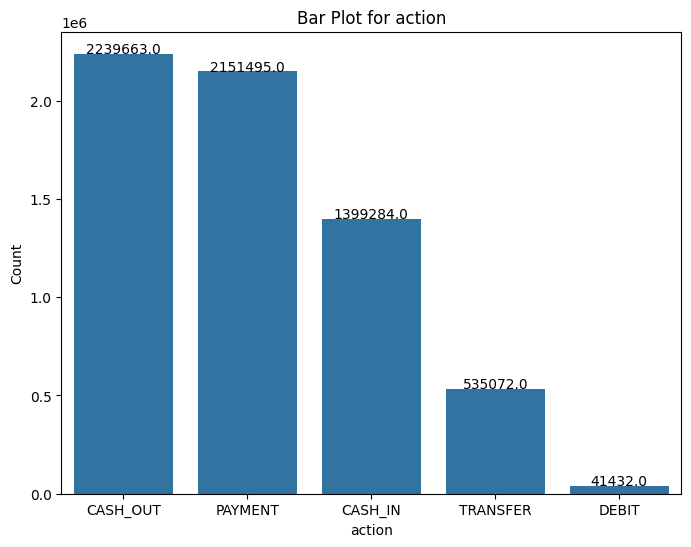

count      6366946
unique           5
top       CASH_OUT
freq       2239663
Name: action, dtype: object

In [28]:
x = 'action'

plt.figure(figsize=(8, 6))

order = df[x].value_counts().index
ax = sns.countplot(x=x, data=df,order=order)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Bar Plot for action')
plt.xlabel(x)
plt.ylabel('Count')

plt.show()
df[x].describe()

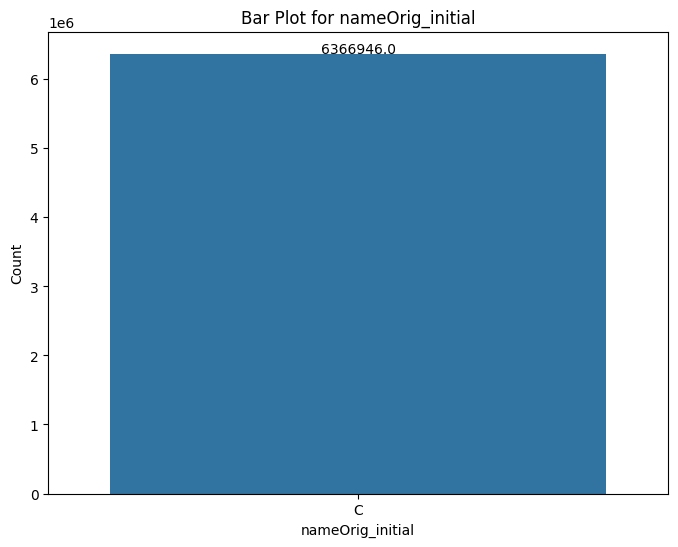

count     6366946
unique          1
top             C
freq      6366946
Name: nameOrig_initial, dtype: object

In [29]:
x = 'nameOrig_initial'

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=x, data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Bar Plot for nameOrig_initial')
plt.xlabel(x)
plt.ylabel('Count')

plt.show()
df[x].describe()

All the transactions are initiated by customers only, no merchants initiated any transactions. (This column will be dropped)

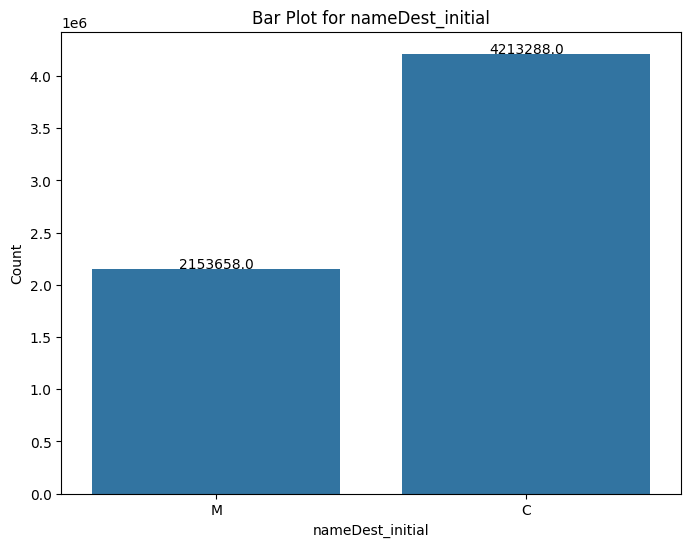

count     6366946
unique          2
top             C
freq      4213288
Name: nameDest_initial, dtype: object

In [30]:
x = 'nameDest_initial'

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=x, data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Bar Plot for nameDest_initial')
plt.xlabel(x)
plt.ylabel('Count')

plt.show()
df[x].describe()

On the destination/receving end, we can see that there are customers as well as merchants receiving the transactions

### Bivariate

Not useful features are dropped based on the univariate analysis

In [31]:
df_dropped = df.drop(["step",'nameOrig','nameDest', 'isUnauthorizedOverdraft', 'nameOrig_initial', 'isFlaggedFraud'], axis=1)
df_dropped

,action,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,nameDest_initial,errorOrig,errorDest
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,M,0.0,9839.64
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,M,0.0,1864.28
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,C,0.0,181.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,C,0.0,21363.00
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,M,0.0,11668.14
...,...,...,...,...,...,...,...,...,...,...
3210701,CASH_OUT,3465336.96,3465336.96,0.00,188880.51,188880.51,1,M,0.0,3465336.96
3210813,TRANSFER,11301545.44,11301545.44,0.00,0.00,11301545.44,1,C,0.0,0.00
3210814,CASH_OUT,11301545.44,11301545.44,0.00,181855.77,181855.77,1,M,0.0,11301545.44
3210864,TRANSFER,3208940.01,3208940.01,0.00,0.00,3208940.01,1,C,0.0,0.00


In [32]:
numerical_features = ["amount", "oldBalanceOrig", "newBalanceOrig", "oldBalanceDest", 
                      "newBalanceDest", "errorOrig", "errorDest", "isFraud"]
categorical_features = ["action", "nameDest_initial"]
features = numerical_features + categorical_features

In [33]:
features

['amount',
 'oldBalanceOrig',
 'newBalanceOrig',
 'oldBalanceDest',
 'newBalanceDest',
 'errorOrig',
 'errorDest',
 'isFraud',
 'action',
 'nameDest_initial']

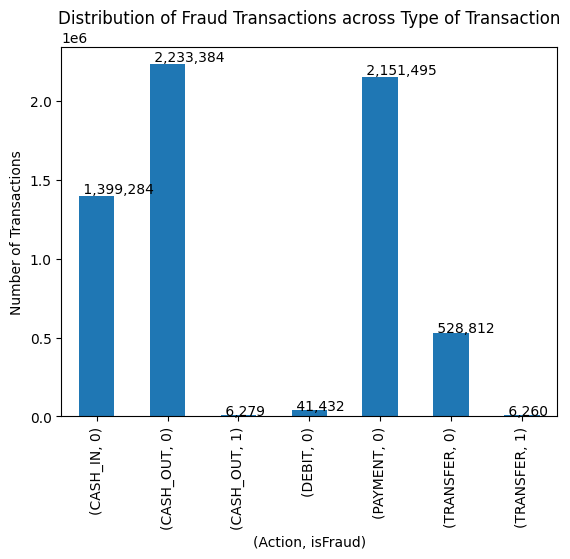

In [36]:
ax = df.groupby(['action', 'isFraud']).size().plot(kind='bar')

ax.set_title("Distribution of Fraud Transactions across Type of Transaction")
ax.set_xlabel("(Action, isFraud)")
ax.set_ylabel("Number of Transactions")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ' ,d')), 
                (p.get_x(), p.get_height()*1.01))


plt.show()

Fraud transactions have occured in only two type of transactions, which are

    when cash is taken out - "CASH_OUT"
    when cash is transferred - "TRANSFER"

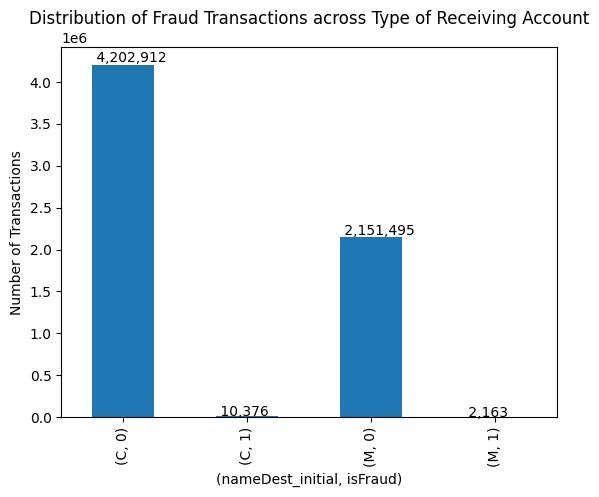

In [37]:
ax = df.groupby(['nameDest_initial', 'isFraud']).size().plot(kind='bar')

ax.set_title("Distribution of Fraud Transactions across Type of Receiving Account")
ax.set_xlabel("(nameDest_initial, isFraud)")
ax.set_ylabel("Number of Transactions")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ' ,d')), 
                (p.get_x(), p.get_height()*1.01))


plt.show()

In [38]:
len(df_dropped[(df_dropped['nameDest_initial']=='C') & (df_dropped['isFraud']==1)])/len(df_dropped[(df_dropped['nameDest_initial']=='C')])

0.0024626847250888142

In [39]:
len(df_dropped[(df_dropped['nameDest_initial']=='M') & (df_dropped['isFraud']==1)])/len(df_dropped[(df_dropped['nameDest_initial']=='M')])

0.001004337736075087

From the above we can see that Customer to customer has twice the probability of being a fraud transaction as compared to Customer to Merchant.

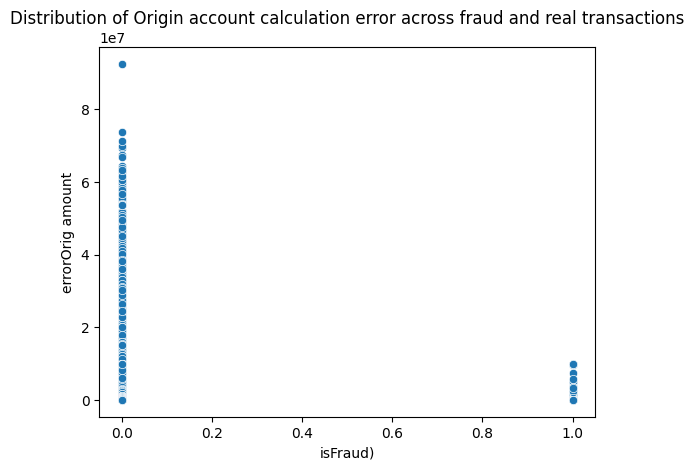

In [40]:
ax = sns.scatterplot(x=df_dropped['isFraud'],y=df_dropped['errorOrig'])
ax.set_title("Distribution of Origin account calculation error across fraud and real transactions")
ax.set_xlabel("isFraud)")
ax.set_ylabel("errorOrig amount")
plt.show()

Here we can see that fraud transactions generally have origin amount error of less than 20 million 

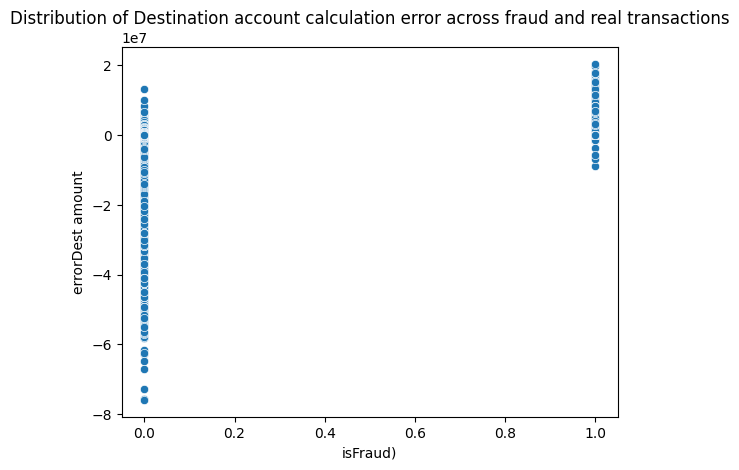

In [41]:
ax = sns.scatterplot(x=df_dropped['isFraud'],y=df_dropped['errorDest'])
ax.set_title("Distribution of Destination account calculation error across fraud and real transactions")
ax.set_xlabel("isFraud)")
ax.set_ylabel("errorDest amount")
plt.show()

Here we can see that fraud transactions generally have origin amount error of less than 20 million but more than -10 million

### Feature transformation

From the above EDA, we confirmed that the fraud transactions only occur in "CASH_OUT" and "TRANSFER" action type.

In [50]:
model_df = df_dropped[(df_dropped.action == 'TRANSFER') | (df_dropped.action == 'CASH_OUT')]

In [51]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2774735 entries, 2 to 3210865
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   action            object 
 1   amount            float64
 2   oldBalanceOrig    float64
 3   newBalanceOrig    float64
 4   oldBalanceDest    float64
 5   newBalanceDest    float64
 6   isFraud           int64  
 7   nameDest_initial  object 
 8   errorOrig         float64
 9   errorDest         float64
dtypes: float64(7), int64(1), object(2)
memory usage: 232.9+ MB


In [52]:
model_df

,action,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,nameDest_initial,errorOrig,errorDest
2,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,C,0.00,181.00
3,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,C,0.00,21363.00
15,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0,C,213808.94,182703.50
19,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,C,214605.30,237735.30
24,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,C,300850.89,-2401220.00
...,...,...,...,...,...,...,...,...,...,...
3210701,CASH_OUT,3465336.96,3465336.96,0.0,188880.51,188880.51,1,M,0.00,3465336.96
3210813,TRANSFER,11301545.44,11301545.44,0.0,0.00,11301545.44,1,C,0.00,0.00
3210814,CASH_OUT,11301545.44,11301545.44,0.0,181855.77,181855.77,1,M,0.00,11301545.44
3210864,TRANSFER,3208940.01,3208940.01,0.0,0.00,3208940.01,1,C,0.00,0.00


In [53]:
from sklearn import preprocessing

In [54]:
le = preprocessing.LabelEncoder()
model_df.loc[:, 'action'] = le.fit_transform(model_df['action'])
model_df.loc[:, 'nameDest_initial'] = le.fit_transform(model_df['nameDest_initial'])

Encoiding categorical columns into numerical 1's and 0's.

In [55]:
model_df

,action,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,nameDest_initial,errorOrig,errorDest
2,1,181.00,181.00,0.0,0.00,0.00,1,0,0.00,181.00
3,0,181.00,181.00,0.0,21182.00,0.00,1,0,0.00,21363.00
15,0,229133.94,15325.00,0.0,5083.00,51513.44,0,0,213808.94,182703.50
19,1,215310.30,705.00,0.0,22425.00,0.00,0,0,214605.30,237735.30
24,1,311685.89,10835.00,0.0,6267.00,2719172.89,0,0,300850.89,-2401220.00
...,...,...,...,...,...,...,...,...,...,...
3210701,0,3465336.96,3465336.96,0.0,188880.51,188880.51,1,1,0.00,3465336.96
3210813,1,11301545.44,11301545.44,0.0,0.00,11301545.44,1,0,0.00,0.00
3210814,0,11301545.44,11301545.44,0.0,181855.77,181855.77,1,1,0.00,11301545.44
3210864,1,3208940.01,3208940.01,0.0,0.00,3208940.01,1,0,0.00,0.00


In [56]:
model_df['isFraud'].value_counts()

isFraud
0    2762196
1      12539
Name: count, dtype: int64

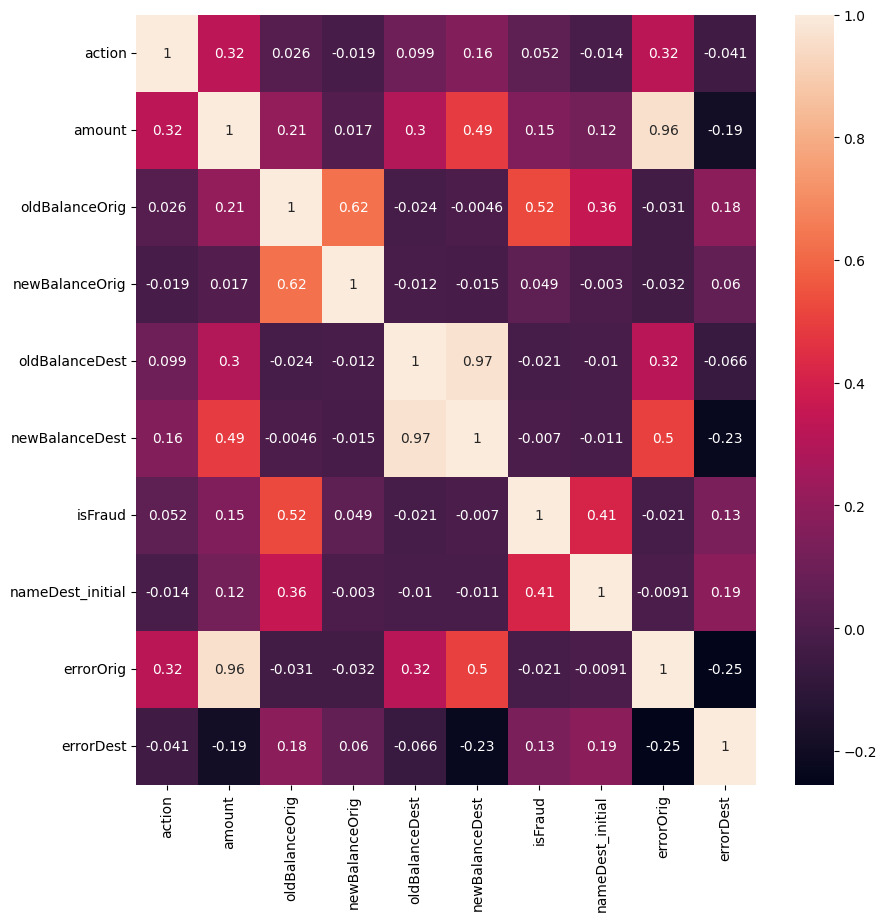

In [57]:
plt.subplots(figsize=(10,10)) 
sns.heatmap(data=model_df.corr(), annot=True)
plt.show()

A short summary of feature's relation with the target variable isFraud

    Old Balance Orig (Original Balance at Origin): Positive correlation with isFraud (0.523).
    
    Name Dest Initial (Initial of Destination Name): Positive correlation with isFraud (0.415).
    
    Error Orig (Error in Origin): Positive correlation with isFraud (0.133).
    
    Amount: Positive correlation with isFraud (0.152).
    
    Action: Positive correlation with isFraud (0.052).

From the above EDA, a better understanding of the data has been achieved. This will used for the machine learning work for fraud detection which is documented in the Train_Test_Model detection file. There, a model is created and fine-tuned to effectively detect fraudulent transactions from the above dataset.